In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use for LSTM 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

# Use for graph plotting
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

In [2]:
tf.random.set_seed(456)

In [3]:
dataframe = pd.read_csv("AAPL_5Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (1136, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-15,39.002499,39.162498,38.762501,38.924999,36.848984,104038800
2017-05-16,38.985001,39.014999,38.680000,38.867500,36.794552,80194000
2017-05-17,38.400002,38.642502,37.427502,37.562500,35.559155,203070800
2017-05-18,37.817501,38.334999,37.782501,38.134998,36.101105,134272800
2017-05-19,38.345001,38.494999,38.157501,38.264999,36.224186,107843200
2017-05-22,38.500000,38.645000,38.227501,38.497501,36.444283,91865600
2017-05-23,38.724998,38.724998,38.327499,38.450001,36.399315,79675600
2017-05-24,38.459999,38.542500,38.167500,38.334999,36.290440,76712000
2017-05-25,38.432499,38.587502,38.257500,38.467499,36.415874,76942400


<function matplotlib.pyplot.show(close=None, block=None)>

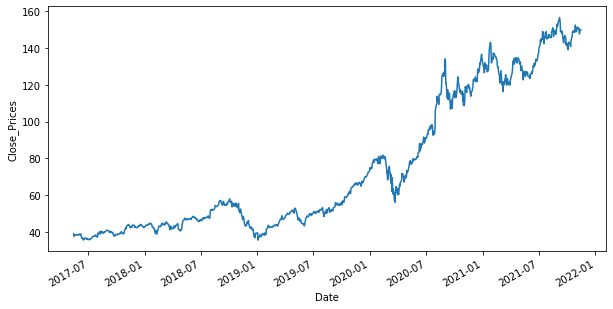

In [4]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

Dimension of train data:  (795, 6)
Dimension of test data:  (341, 6)


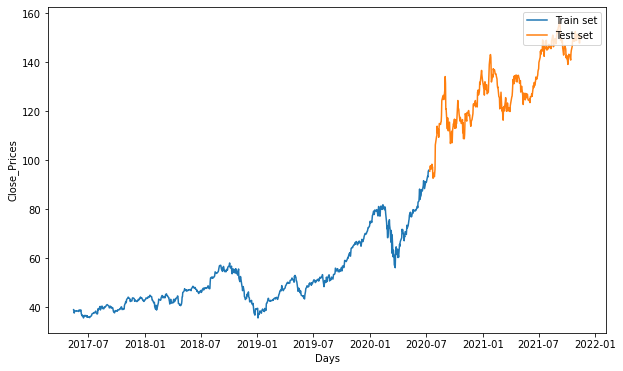

In [5]:
# Split train data and test data
training_size_LR = int(len(dataframe)*0.7)
train_dataset_LR, test_dataset_LR = dataframe.iloc[:training_size_LR], dataframe.iloc[training_size_LR:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset_LR.Close)
plt.plot(test_dataset_LR.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset_LR.shape)
print('Dimension of test data: ', test_dataset_LR.shape)

In [6]:
#Split train data for X and Y
train_dataset_LR = train_dataset_LR.reset_index().drop('Date',axis = 1)

X_train_LR = train_dataset_LR.drop(['Close','Adj Close'], axis = 1)
Y_train_LR = train_dataset_LR[['Close']]

#Split test data for X and Y
test_dataset_LR = test_dataset_LR.reset_index().drop('Date',axis = 1)

X_test_LR = test_dataset_LR.drop(['Close','Adj Close'], axis = 1)
Y_test_LR = test_dataset_LR[['Close']]

print(X_train_LR)
print(Y_test_LR)

          Open       High        Low     Volume
0    39.002499  39.162498  38.762501  104038800
1    38.985001  39.014999  38.680000   80194000
2    38.400002  38.642502  37.427502  203070800
3    37.817501  38.334999  37.782501  134272800
4    38.345001  38.494999  38.157501  107843200
..         ...        ...        ...        ...
790  92.500000  93.945000  92.467499  118655600
791  93.852501  94.654999  93.057503  112424400
792  94.180000  95.375000  94.089996  117092000
793  96.262497  96.317497  94.672501  125642800
794  95.334999  95.980003  94.705002   90257200

[795 rows x 4 columns]
          Close
0     95.477501
1     97.057503
2     97.724998
3     96.522499
4     96.327499
..          ...
336  150.809998
337  147.919998
338  147.869995
339  149.990005
340  150.000000

[341 rows x 1 columns]


In [7]:
#Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#Fit the scaler using available training data
input_scaler_LR = scaler_x.fit(X_train_LR)
output_scaler_LR = scaler_y.fit(Y_train_LR)

#Apply the scaler to training data
X_train_normalize_LR = input_scaler_LR.transform(X_train_LR)
Y_train_normalize_LR = output_scaler_LR.transform(Y_train_LR)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#Fit the scaler using available training data
input_scaler_test_LR = scaler_x_test.fit(X_test_LR)
output_scaler_test_LR = scaler_y_test.fit(Y_test_LR)

#Apply the scaler to test data
X_test_normalize_LR = input_scaler_test_LR.transform(X_test_LR)
Y_test_normalize_LR = output_scaler_test_LR.transform(Y_test_LR)



print('X_train_normalize.shape:', X_train_normalize_LR.shape)
print('Y_train_normalize.shape:', Y_train_normalize_LR.shape)
print('X_test_normalize.shape:', X_test_normalize_LR.shape)
print('Y_test_normalize.shape:', Y_test_normalize_LR.shape)

X_train_normalize.shape: (795, 4)
Y_train_normalize.shape: (795, 1)
X_test_normalize.shape: (341, 4)
Y_test_normalize.shape: (341, 1)


In [8]:
print("X_train_normalize: \n", X_train_normalize_LR)
print("Y_train_normalize: \n", Y_train_normalize_LR)
print("\n\n")
print("X_test_normalize: \n", X_test_normalize_LR)
print("Y_test_normalize: \n", Y_test_normalize_LR)

X_train_normalize: 
 [[0.05414001 0.05439051 0.05510516 0.15375661]
 [0.05385097 0.05195019 0.05371168 0.09118201]
 [0.04418755 0.04578735 0.0325564  0.41364082]
 ...
 [0.96559988 0.98440672 0.98961226 0.1880114 ]
 [1.         1.         0.99945104 0.21045079]
 [0.98467895 0.99441628 1.         0.11759031]]
Y_train_normalize: 
 [[5.59443152e-02]
 [5.49919113e-02]
 [3.33761083e-02]
 [4.28588700e-02]
 [4.50121849e-02]
 [4.88633094e-02]
 [4.80765273e-02]
 [4.61716533e-02]
 [4.83663613e-02]
 [4.72897286e-02]
 [4.75381861e-02]
 [4.37698974e-02]
 [4.55090834e-02]
 [5.49090756e-02]
 [4.86148022e-02]
 [5.07681171e-02]
 [5.45777989e-02]
 [5.30042678e-02]
 [2.81170746e-02]
 [1.33752791e-02]
 [1.82201839e-02]
 [1.22986465e-02]
 [8.69596300e-03]
 [3.31276674e-04]
 [1.71849443e-02]
 [1.16774696e-02]
 [1.52386939e-02]
 [1.42448970e-02]
 [1.69365034e-02]
 [1.50316956e-02]
 [6.37704284e-03]
 [1.50730721e-02]
 [6.16997836e-03]
 [7.57795392e-03]
 [5.42463897e-03]
 [7.86778788e-03]
 [2.23608442e-03]
 [8.

In [9]:
from sklearn.linear_model import LinearRegression

Multivariable_LR = LinearRegression()
Multivariable_LR.fit(X_train_normalize_LR, Y_train_normalize_LR)
Multivariable_LR.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [10]:
score = Multivariable_LR.score(X_train_normalize_LR,Y_train_normalize_LR)

print("Linear Score: ", score)
print("R2_score: ", '{:.2f}'.format(score*100))

Linear Score:  0.9991596708827426
R2_score:  99.92


In [11]:
Multivariable_LR.coef_

array([[-0.55288372,  0.80484099,  0.73333675, -0.0057991 ]])

In [12]:
# Make Prediction
def predict(model):
    prediction_of_LR = model.predict(X_test_normalize_LR)
    prediction_of_LR_readable = scaler_y_test.inverse_transform(prediction_of_LR)
    return prediction_of_LR_readable

prediction_of_LR_readable = predict(Multivariable_LR)


In [13]:
Y_test_read_LR = scaler_y_test.inverse_transform(Y_test_normalize_LR)
Y_train_read_LR = scaler_y.inverse_transform(Y_train_normalize_LR)

print(Y_test_read_LR)
print("\nPrediction\n")
print(prediction_of_LR_readable)

[[ 95.477501]
 [ 97.057503]
 [ 97.724998]
 [ 96.522499]
 [ 96.327499]
 [ 98.357498]
 [ 97.      ]
 [ 97.272499]
 [ 92.845001]
 [ 92.614998]
 [ 94.809998]
 [ 93.252502]
 [ 95.040001]
 [ 96.190002]
 [106.260002]
 [108.9375  ]
 [109.665001]
 [110.0625  ]
 [113.902496]
 [111.112503]
 [112.727501]
 [109.375   ]
 [113.010002]
 [115.010002]
 [114.907501]
 [114.607498]
 [115.5625  ]
 [115.707497]
 [118.275002]
 [124.370003]
 [125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.

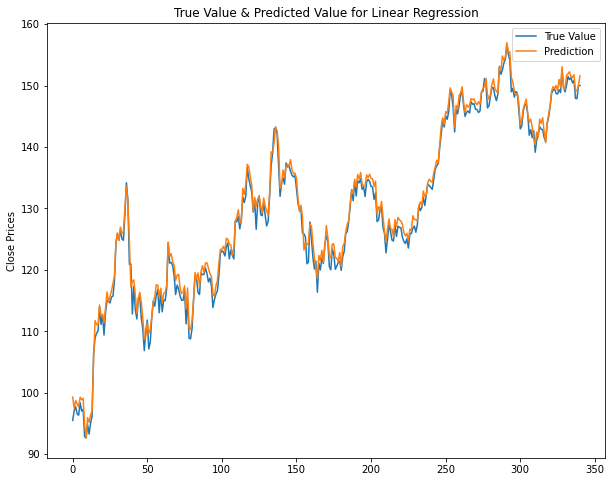

In [14]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(prediction_of_LR_readable, Y_test_read_LR, 'Linear Regression')

In [15]:
#accuracy
print("Linear Score: ", Multivariable_LR.score(X_test_normalize_LR, Y_test_normalize_LR))

R2_score = Multivariable_LR.score(X_test_normalize_LR, Y_test_normalize_LR)*100
print('R2_score: {:.2f}'.format(R2_score))


Linear Score:  0.9909388242197786
R2_score: 99.09


In [16]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    r2 = sklm.r2_score(y_true, y_predicted)
    print('R-square (R^2)                = {:.2f}'.format(r2*100))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read_LR, prediction_of_LR_readable, "5-year", "LR") 

This prediction model is: LR
The size of dataset is: 5-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 1.8301
Root Mean Square Error (RMSE) = 1.3528
Mean Absolute Error (MAE)     = 1.1023
R-square (R^2)                = 99.09
+-----------------------------+--------+


In [17]:
print("Shape of the Predicted value from LR: ", prediction_of_LR_readable.shape)
print("\nPredicted value from LR: ", prediction_of_LR_readable)


Shape of the Predicted value from LR:  (341, 1)

Predicted value from LR:  [[ 99.27780889]
 [ 97.4429634 ]
 [ 98.71476309]
 [ 98.16613209]
 [ 97.70511523]
 [ 99.25833766]
 [ 98.85612132]
 [ 99.07995426]
 [ 94.76844775]
 [ 92.64945495]
 [ 95.93372961]
 [ 95.14816992]
 [ 96.37482864]
 [ 96.96029462]
 [105.24875879]
 [111.74848968]
 [111.07515046]
 [111.04925092]
 [114.28057354]
 [112.54727704]
 [112.72560705]
 [111.41156425]
 [113.71962562]
 [116.39322014]
 [114.75630756]
 [115.67907338]
 [116.57477648]
 [117.74187726]
 [118.96232256]
 [124.56855001]
 [126.01317359]
 [124.78119268]
 [126.9552671 ]
 [125.94173128]
 [126.21287801]
 [130.0092357 ]
 [133.62134644]
 [130.98338594]
 [124.63967648]
 [117.18386958]
 [118.09306932]
 [118.35527082]
 [115.78839515]
 [112.87036284]
 [115.41324598]
 [116.33531739]
 [114.63207898]
 [112.11755185]
 [108.6851775 ]
 [109.22597846]
 [111.37645428]
 [109.65866484]
 [110.33544612]
 [112.28481958]
 [114.75661204]
 [115.60715593]
 [117.56708615]
 [117.4905340

In [18]:
print("Shape of the test set from LR: ", Y_test_read_LR.shape)
print("\nActual Value from test set in LR: ", Y_test_read_LR)


Shape of the test set from LR:  (341, 1)

Actual Value from test set in LR:  [[ 95.477501]
 [ 97.057503]
 [ 97.724998]
 [ 96.522499]
 [ 96.327499]
 [ 98.357498]
 [ 97.      ]
 [ 97.272499]
 [ 92.845001]
 [ 92.614998]
 [ 94.809998]
 [ 93.252502]
 [ 95.040001]
 [ 96.190002]
 [106.260002]
 [108.9375  ]
 [109.665001]
 [110.0625  ]
 [113.902496]
 [111.112503]
 [112.727501]
 [109.375   ]
 [113.010002]
 [115.010002]
 [114.907501]
 [114.607498]
 [115.5625  ]
 [115.707497]
 [118.275002]
 [124.370003]
 [125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]

In [19]:
Residual = Y_test_read_LR - prediction_of_LR_readable
Residual

array([[-3.80030789e+00],
       [-3.85460396e-01],
       [-9.89765087e-01],
       [-1.64363309e+00],
       [-1.37761623e+00],
       [-9.00839655e-01],
       [-1.85612132e+00],
       [-1.80745526e+00],
       [-1.92344675e+00],
       [-3.44569518e-02],
       [-1.12373161e+00],
       [-1.89566792e+00],
       [-1.33482764e+00],
       [-7.70292619e-01],
       [ 1.01124321e+00],
       [-2.81098968e+00],
       [-1.41014946e+00],
       [-9.86750917e-01],
       [-3.78077539e-01],
       [-1.43477404e+00],
       [ 1.89395092e-03],
       [-2.03656425e+00],
       [-7.09623623e-01],
       [-1.38321814e+00],
       [ 1.51193437e-01],
       [-1.07157538e+00],
       [-1.01227648e+00],
       [-2.03438026e+00],
       [-6.87320562e-01],
       [-1.98547012e-01],
       [-1.55675586e-01],
       [ 4.38043188e-02],
       [-4.32768101e-01],
       [-9.31729276e-01],
       [-1.40537501e+00],
       [-9.69242698e-01],
       [ 5.58646555e-01],
       [ 4.16608056e-01],
       [-3.7

In [20]:
dataframe_for_LSTM = pd.DataFrame(Residual, columns=['Residual'])
dataframe_for_LSTM.index = pd.RangeIndex(543, 543+len(dataframe_for_LSTM))
dataframe_for_LSTM

,Residual
543,-3.800308
544,-0.385460
545,-0.989765
546,-1.643633
547,-1.377616
...,...
879,-0.960277
880,-1.303147
881,-1.265183
882,-0.038325


<function matplotlib.pyplot.show(close=None, block=None)>

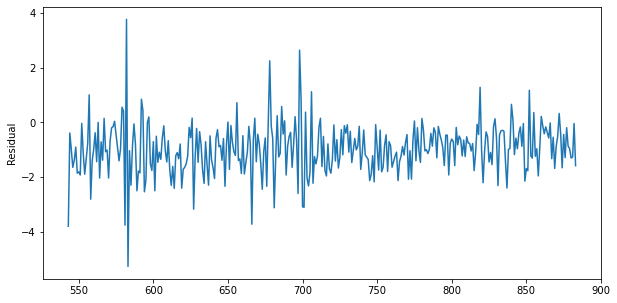

In [21]:
dataframe_for_LSTM.Residual.plot(figsize=(10,5))
plt.ylabel("Residual")
plt.show

Dimension of train data:  (238, 1)
Dimension of test data:  (103, 1)


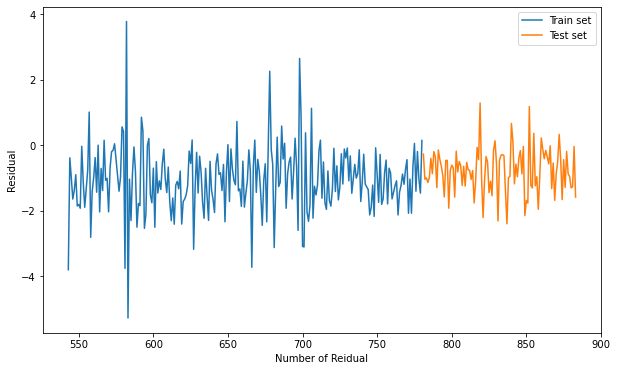

In [22]:
# Split train data and test data
training_size_LSTM = int(len(dataframe_for_LSTM)*0.7)
LSTM_train_dataset, LSTM_test_dataset = dataframe_for_LSTM.iloc[:training_size_LSTM], dataframe_for_LSTM.iloc[training_size_LSTM:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(LSTM_train_dataset)
plt.plot(LSTM_test_dataset)
plt.xlabel('Number of Reidual')
plt.ylabel('Residual')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', LSTM_train_dataset.shape)
print('Dimension of test data: ', LSTM_test_dataset.shape)

In [23]:
LSTM_train_dataset

,Residual
543,-3.800308
544,-0.385460
545,-0.989765
546,-1.643633
547,-1.377616
...,...
776,-1.404570
777,-0.194194
778,-1.043292
779,-1.461811


In [24]:
#Split train data for X and Y
X_train_LSTM = LSTM_train_dataset
Y_train_LSTM = LSTM_train_dataset



#Split test data for X and Y
X_test_LSTM = LSTM_test_dataset
Y_test_LSTM = LSTM_test_dataset


print(X_train_LSTM)
print(Y_train_LSTM)
print(X_test_LSTM)
print(Y_test_LSTM)

     Residual
543 -3.800308
544 -0.385460
545 -0.989765
546 -1.643633
547 -1.377616
..        ...
776 -1.404570
777 -0.194194
778 -1.043292
779 -1.461811
780  0.145285

[238 rows x 1 columns]
     Residual
543 -3.800308
544 -0.385460
545 -0.989765
546 -1.643633
547 -1.377616
..        ...
776 -1.404570
777 -0.194194
778 -1.043292
779 -1.461811
780  0.145285

[238 rows x 1 columns]
     Residual
781 -0.273010
782 -1.040887
783 -0.996999
784 -1.138106
785 -0.984448
..        ...
879 -0.960277
880 -1.303147
881 -1.265183
882 -0.038325
883 -1.583558

[103 rows x 1 columns]
     Residual
781 -0.273010
782 -1.040887
783 -0.996999
784 -1.138106
785 -0.984448
..        ...
879 -0.960277
880 -1.303147
881 -1.265183
882 -0.038325
883 -1.583558

[103 rows x 1 columns]


In [25]:
#Different scaler for input and output


scaler_x_LSTM = MinMaxScaler(feature_range = (0,1))
scaler_y_LSTM = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_LSTM = scaler_x_LSTM.fit(X_train_LSTM)
output_scaler_LSTM = scaler_y_LSTM.fit(Y_train_LSTM)

#Apply the scaler to training data
X_train_normalize_LSTM = input_scaler_LSTM.transform(X_train_LSTM)
Y_train_normalize_LSTM = output_scaler_LSTM.transform(Y_train_LSTM)



#Different scaler for input and output
scaler_x_LSTM_test = MinMaxScaler(feature_range = (0,1))
scaler_y_LSTM_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_LSTM_test = scaler_x_LSTM_test.fit(X_test_LSTM)
output_scaler_LSTM_test = scaler_y_LSTM_test.fit(Y_test_LSTM)

#Apply the scaler to test data
X_test_normalize_LSTM = input_scaler_LSTM_test.transform(X_test_LSTM)
Y_test_normalize_LSTM = output_scaler_LSTM_test.transform(Y_test_LSTM)



print('X_train_normalize_LSTM.shape:', X_train_normalize_LSTM.shape)
print('Y_train_normalize_LSTM.shape:', Y_train_normalize_LSTM.shape)
print('X_test_normalize_LSTM.shape:', X_test_normalize_LSTM.shape)
print('Y_test_normalize_LSTM.shape:', Y_test_normalize_LSTM.shape)

X_train_normalize_LSTM.shape: (238, 1)
Y_train_normalize_LSTM.shape: (238, 1)
X_test_normalize_LSTM.shape: (103, 1)
Y_test_normalize_LSTM.shape: (103, 1)


In [26]:
print('X_test_normalize:\n', X_train_normalize_LSTM)
print('\nY_test_normalize:\n', Y_train_normalize_LSTM)
print('\nX_test_normalize:\n', X_test_normalize_LSTM)
print('\nY_test_normalize:\n', Y_test_normalize_LSTM)

X_test_normalize:
 [[0.16275048]
 [0.5401151 ]
 [0.47333519]
 [0.40107819]
 [0.43047492]
 [0.48316208]
 [0.37759675]
 [0.38297469]
 [0.37015681]
 [0.57890345]
 [0.45853095]
 [0.37322657]
 [0.43520336]
 [0.49758844]
 [0.69446066]
 [0.27207709]
 [0.42687977]
 [0.47366828]
 [0.54093096]
 [0.42415858]
 [0.58292048]
 [0.35765654]
 [0.50429279]
 [0.42985587]
 [0.59941912]
 [0.46429458]
 [0.47084753]
 [0.35789788]
 [0.50675744]
 [0.56077035]
 [0.56550794]
 [0.58755187]
 [0.53488727]
 [0.47974856]
 [0.42740738]
 [0.47560306]
 [0.64444555]
 [0.6287493 ]
 [0.1672402 ]
 [1.        ]
 [0.        ]
 [0.46830649]
 [0.32872216]
 [0.48652998]
 [0.57682724]
 [0.49482314]
 [0.30621356]
 [0.38627878]
 [0.37880567]
 [0.67708678]
 [0.63062081]
 [0.30217123]
 [0.34893965]
 [0.58217848]
 [0.60518687]
 [0.41505436]
 [0.38854061]
 [0.50529736]
 [0.30604218]
 [0.52706506]
 [0.42140735]
 [0.46245496]
 [0.4333911 ]
 [0.51951113]
 [0.56925565]
 [0.46831195]
 [0.42278777]
 [0.50899764]
 [0.39090279]
 [0.32816437]
 

In [27]:
# Create a 3D input 
def create_3D_dataset(dataset, time_steps=1):
    X_dataset = []
    Y_dataset = []
    for i in range (len(dataset) - time_steps):
        V = dataset[i:(i+time_steps),0]
        X_dataset.append(V)
        Y_dataset.append(dataset[i+time_steps,0])
    return np.array(X_dataset), np.array(Y_dataset)

time_Steps = 30

X_train_LSTM, Y_train_LSTM = create_3D_dataset(X_train_normalize_LSTM, time_Steps)
X_test_LSTM, Y_test_LSTM = create_3D_dataset(X_test_normalize_LSTM, time_Steps)

print('X_train.shape_LSTM:', X_train_LSTM.shape)
print('Y_train.shape_LSTM:', Y_train_LSTM.shape)
print('X_test.shape_LSTM:', X_test_LSTM.shape)
print('Y_test.shape_LSTM:', Y_test_LSTM.shape)

X_train.shape_LSTM: (208, 30)
Y_train.shape_LSTM: (208,)
X_test.shape_LSTM: (73, 30)
Y_test.shape_LSTM: (73,)


In [28]:
X_train_LSTM = np.reshape(X_train_LSTM,(X_train_LSTM.shape[0],X_train_LSTM.shape[1],1))
X_test_LSTM = np.reshape(X_test_LSTM,(X_test_LSTM.shape[0],X_test_LSTM.shape[1],1))

print('X_train_LSTM.shape:', X_train_LSTM.shape)
print('X_test_LSTM.shape:', X_test_LSTM.shape)

Y_train_LSTM = np.reshape(Y_train_LSTM,(Y_train_LSTM.shape[0],1))
Y_test_LSTM = np.reshape(Y_test_LSTM,(Y_test_LSTM.shape[0],1))

print('Y_train_LSTM.shape:', Y_train_LSTM.shape)
print('Y_test_LSTM.shape:', Y_test_LSTM.shape)

X_train_LSTM.shape: (208, 30, 1)
X_test_LSTM.shape: (73, 30, 1)
Y_train_LSTM.shape: (208, 1)
Y_test_LSTM.shape: (73, 1)


In [29]:
def create_LSTM_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=True,input_shape=[X_train_LSTM.shape[1], X_train_LSTM.shape[2]]))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #Compile model
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

LSTM_model = create_LSTM_model(64)

In [ ]:
# Fit LSTM 
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    record = model.fit(X_train_LSTM, Y_train_LSTM, epochs = 200, validation_split = 0.2, batch_size = 64,
                      shuffle = False)
    return record

print("\n\nLSTM_record")
LSTM_record = fit_model(LSTM_model)



LSTM_record
Epoch 1/200
3/3 [==============================] - 4s 454ms/step - loss: 0.1445 - val_loss: 0.0277
Epoch 2/200
3/3 [==============================] - 0s 54ms/step - loss: 0.0273 - val_loss: 0.0310
Epoch 3/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0389 - val_loss: 0.0101
Epoch 4/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0195 - val_loss: 0.0072
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0227 - val_loss: 0.0122
Epoch 6/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0253 - val_loss: 0.0095
Epoch 7/200
3/3 [==============================] - 0s 43ms/step - loss: 0.0203 - val_loss: 0.0054
Epoch 8/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0184 - val_loss: 0.0060
Epoch 9/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0174 - val_loss: 0.0072
Epoch 10/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0186 - val_loss: 0.0057
Epoc

In [ ]:
# Flot train loss and validation loss
def plot_loss (record,model_name):
    plt.figure(figsize = (10,8))
    plt.plot(record.history['loss'])
    #plt.plot(record.history['val_loss'])
    plt.title('Train loss '+ model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss','Validation Loss'], loc='upper right')
    
#plot_loss(BidirecLSTM_record,'Bidirectional_LSTM')
plot_loss(LSTM_record,'LSTM')

In [ ]:
# Make Prediction
def predict(model):
    prediction = model.predict(X_test_LSTM)
    prediction = scaler_x_LSTM_test.inverse_transform(prediction)
    return prediction

prediction_of_LSTM = predict(LSTM_model)

print(prediction_of_LSTM.shape)
print(prediction_of_LSTM)

In [ ]:
Y_test_read_LSTM = scaler_x_LSTM_test.inverse_transform(Y_test_LSTM) 
Y_train_read_LSTM = scaler_x_LSTM.inverse_transform(Y_train_LSTM)

print(Y_test_read_LSTM.shape)
print(Y_test_read_LSTM)

In [ ]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(prediction_of_LSTM, Y_test_read_LSTM, 'LSTM')

In [ ]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read_LSTM, prediction_of_LSTM, "5-year",'LSTM') 


In [ ]:
print("The shape of Y_test_data:", Y_test_read_LSTM.shape)
print("Residual from LR prediction")
print(Y_test_read_LSTM)

print("The shape of LSTM_prediction_data:", prediction_of_LSTM.shape, "\n")
print("\n\nPredict Data from LSTM")
print(prediction_of_LSTM)

In [ ]:
print("The shape of LR_prediction_data: ",  prediction_of_LR_readable.shape)
print("\n\nPredict Data from LR: \n",  prediction_of_LR_readable)

In [ ]:
dataframe_prediction_of_LR = pd.DataFrame(prediction_of_LR_readable, columns=['residual_from_LR'])
dataframe_prediction_of_LR 

In [ ]:
split_index = (int(len(dataframe_prediction_of_LR)*0.7)) + 30
predicted_value_from_LR = dataframe_prediction_of_LR.iloc[split_index:]

predicted_value_from_LR  = predicted_value_from_LR .to_numpy()
print("Shape of predicted value from LR: ", predicted_value_from_LR.shape)
print("Predicted value from LR: \n", predicted_value_from_LR )

In [ ]:
predicted_y_hat = np.add(predicted_value_from_LR ,prediction_of_LSTM)
predicted_y_hat

In [ ]:
dataframe_Y_true_value_final = pd.DataFrame(Y_test_read_LR, columns=['True Value']) 
print(dataframe_Y_true_value_final)

In [ ]:
final_split = (int(len(dataframe_prediction_of_LR)*0.7)) + 30 

Y_true_value_final = dataframe_Y_true_value_final.iloc[final_split:]
Y_true_value_final = Y_true_value_final.to_numpy()

print("Shape of the Y true value for LR-LSTM: ", Y_true_value_final.shape)
print("The Y true value for LR-LSTM: ", Y_true_value_final)

print("\n\nShape of final prediction for LR-LSTM(y-hat): ", predicted_y_hat.shape)

In [ ]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(predicted_y_hat,Y_true_value_final, 'Prediction of LR-LSTM')

In [ ]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_true_value_final, predicted_y_hat, "5-year",'LR-LSTM') 